# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

filterwarnings('ignore')

# DATA LOADING

In [2]:
data = pd.read_csv('./input/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.drop('Unnamed: 32', axis=1, inplace=True)

# Data Refactoring

In [6]:
data['diagnosis'] = data['diagnosis'].replace('M', 1).replace('B', 0)

In [12]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [13]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# EDA Block

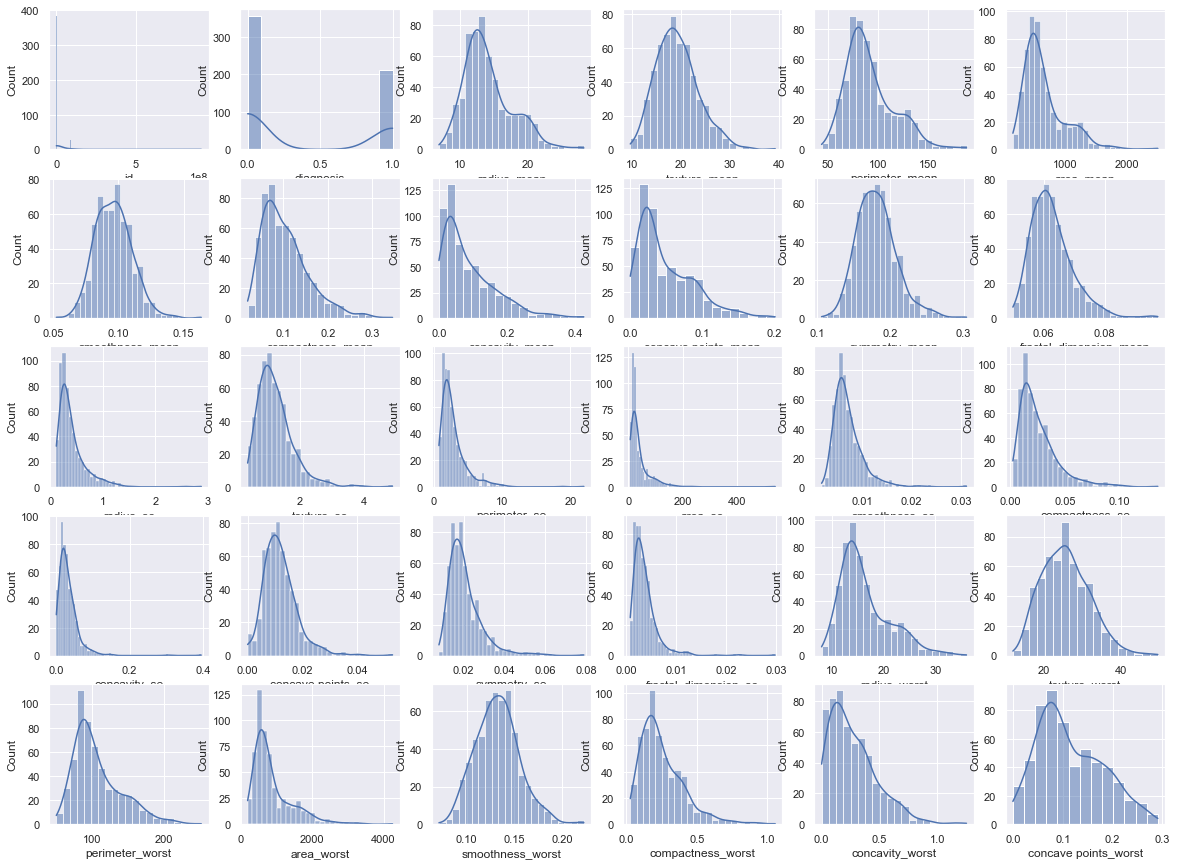

In [19]:
#---------------------------------DITRIBUTION---------------------------------

plt.figure(figsize=(20,15))
sns.set(style='darkgrid')
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5,6, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.show()

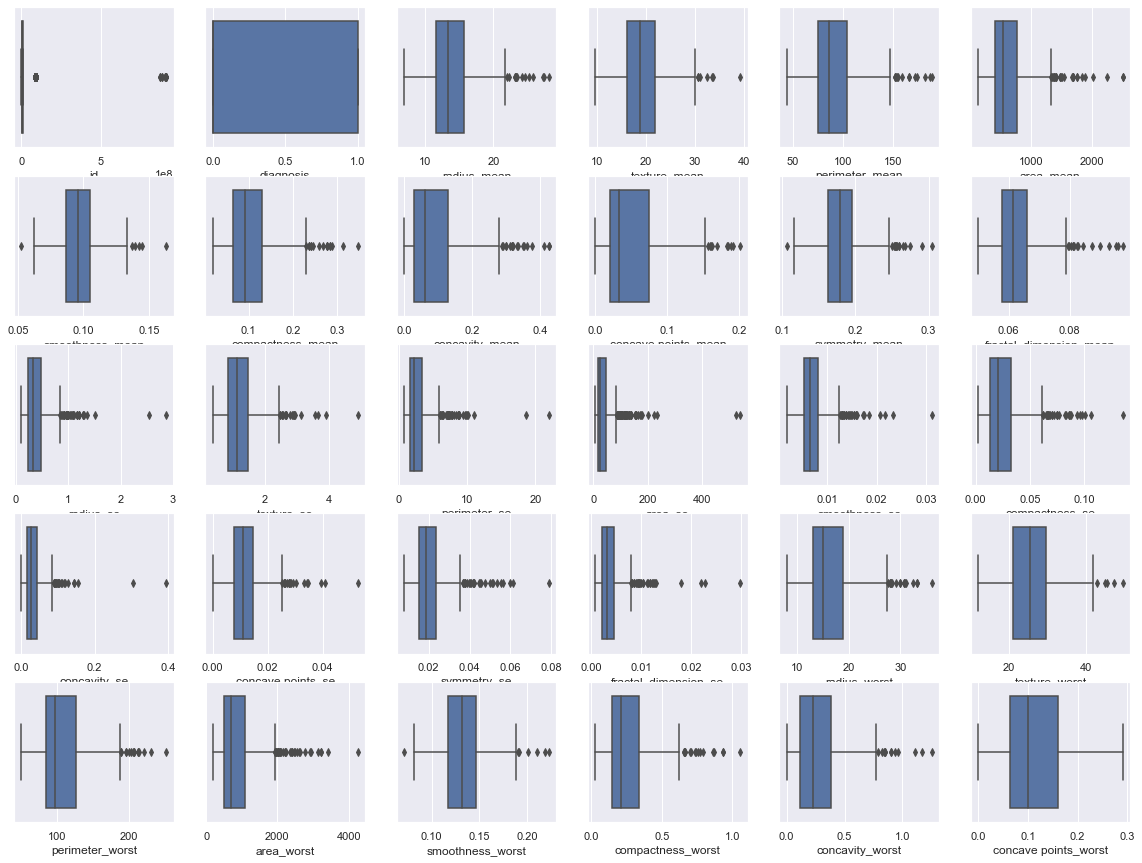

In [20]:
#---------------------------------OUTLIERS---------------------------------

plt.figure(figsize=(20,15))
plotnumber = 1

for column in data:
    if plotnumber <= 30:
        ax = plt.subplot(5,6, plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column)
        
    plotnumber += 1
    
plt.show()

<AxesSubplot:>

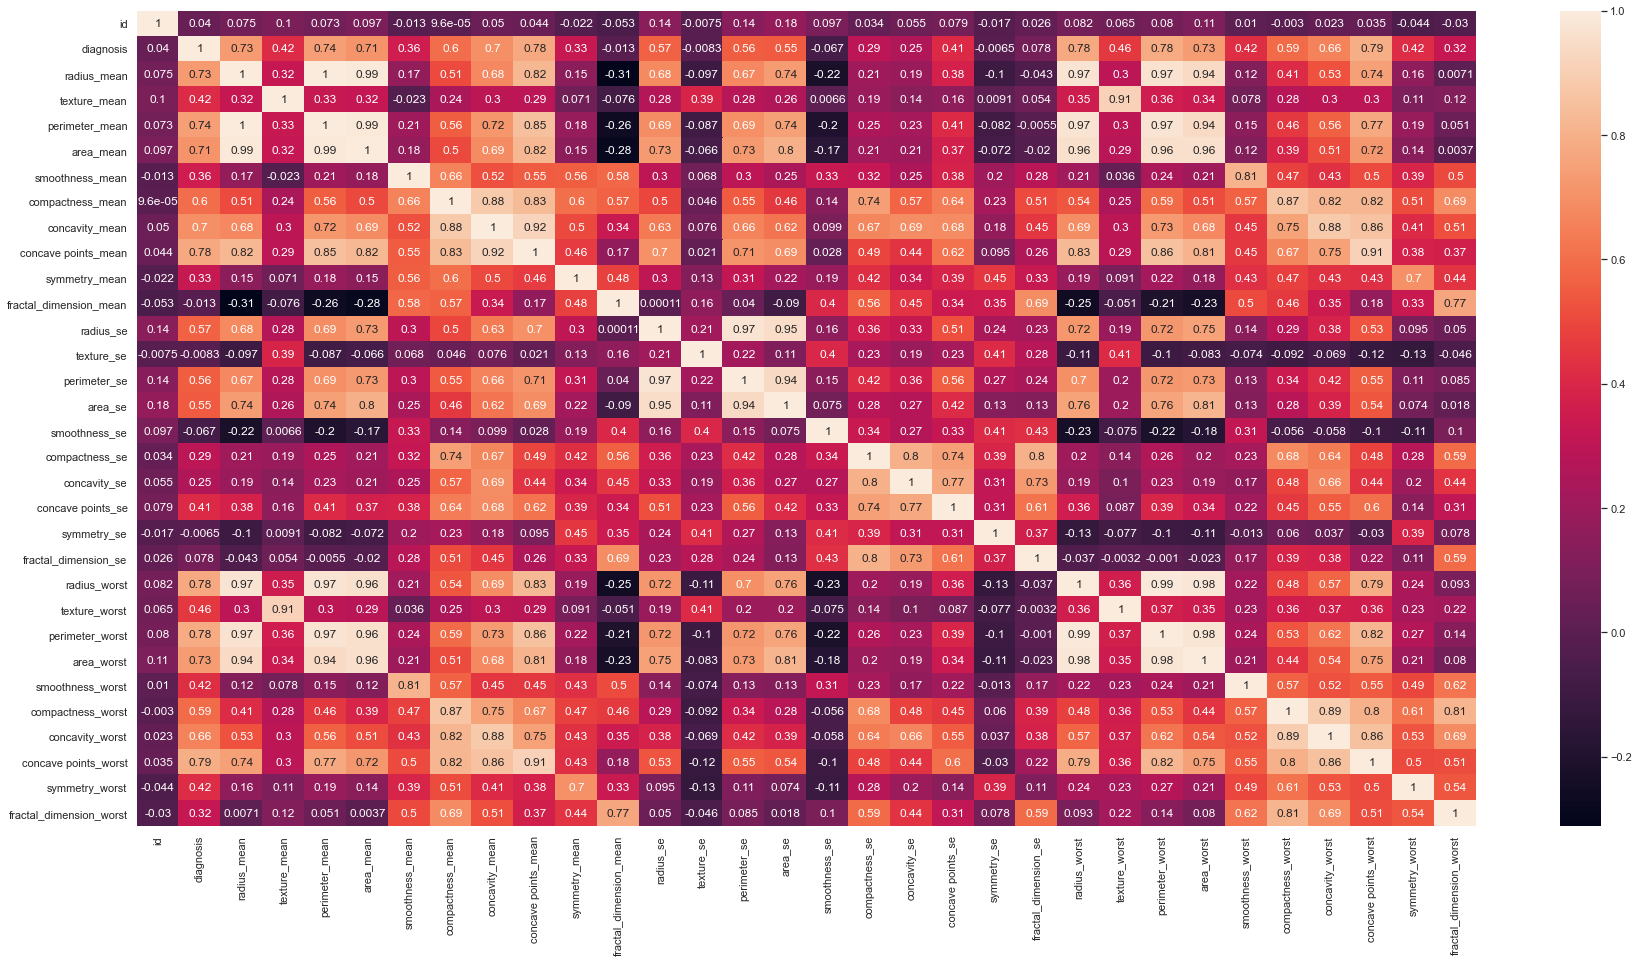

In [21]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr(), annot=True)

In [22]:
c={"Agg_of_all":(data["radius_mean"]+data["texture_mean"]+data["perimeter_mean"]+data["area_mean"]+data["smoothness_mean"]+data["compactness_mean"]+
                data["concavity_mean"]+data["concave points_mean"]+data["symmetry_mean"]+data["fractal_dimension_mean"]+data["radius_se"]+data["texture_se"]+
                data["perimeter_se"]+data["area_se"]+data["smoothness_se"]+data["compactness_se"]+data["concavity_se"]+data["concave points_se"]+
                data["fractal_dimension_se"]+data["symmetry_se"]+data["radius_worst"]+data["texture_worst"]+data["perimeter_worst"]+data["area_worst"]+
                data["smoothness_worst"]+data["compactness_worst"]+data["concavity_worst"]+data["concave points_worst"]+data["symmetry_worst"]+data["fractal_dimension_worst"]),"diagnosis":data["diagnosis"]}
data_1 = pd.DataFrame(data=c)

In [23]:
data_1

,Agg_of_all,diagnosis
0,3566.178472,1
1,3740.923467,1
2,3387.392551,1
3,1240.001848,1
4,3336.684215,1
...,...,...
564,4080.936389,1
565,3497.889567,1
566,2370.262815,1
567,3624.265897,1


# FEATURE ENGINEERING

In [24]:
data_1['Agg_of_all'] = (data_1['Agg_of_all'] - data_1['Agg_of_all'].min()) / (data_1['Agg_of_all'].max() - data_1['Agg_of_all'].min())

In [25]:
data_1.head()

,Agg_of_all,diagnosis
0,0.416536,1
1,0.440160,1
2,0.392366,1
3,0.102058,1
4,0.385510,1


<AxesSubplot:xlabel='Agg_of_all', ylabel='diagnosis'>

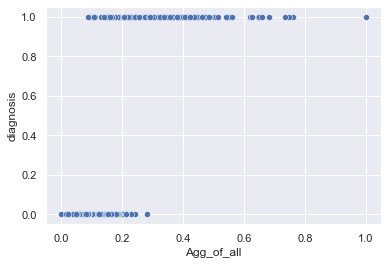

In [27]:
sns.scatterplot(data=data_1, x='Agg_of_all', y='diagnosis', legend='auto')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif_features = dataset.columns
    
    vif['vif_values'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    
    return vif

In [30]:
features = data[['radius_mean', 'texture_mean', 
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

calculate_vif(features)

,vif_values
0,7556.009843
1,250.766688
2,1281.013160
3,387.169455
4,115.036662
5,147.434285
6,154.239026
7,184.296547
8,606.487835
9,229.343950


# MODELING

In [31]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=500)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
classifier = LogisticRegression().fit(X_train, y_train)

In [38]:
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
accuracy_score(y_train, classifier.predict(X_train))

0.9798994974874372

In [41]:
accuracy_score(y_test, classifier.predict(X_test))

0.9766081871345029

In [42]:
confusion_matrix(y_test, y_pred)

array([[111,   4],
       [  0,  56]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       115
           1       0.93      1.00      0.97        56

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.97       171
weighted avg       0.98      0.98      0.98       171



In [47]:
submission = pd.DataFrame({'Y-TEST':y_test, 'Y_PRED':y_pred})
submission.to_csv('submission.csv', index=False)